In [82]:
#Import all needed
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  mean_squared_error,r2_score, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso

In [83]:
#Import data by the function

def importData(set):
    Header = ["unit number","time, in cycles", "operational setting 1", "operational setting 2", "operational setting 3",
               "sensor measurement 1", "sensor measurement 2", "sensor measurement 3", "sensor measurement 4",
                 "sensor measurement 5","sensor measurement 6", "sensor measurement 7", "sensor measurement 8", "sensor measurement 9",
                "sensor measurement 10", "sensor measurement 11", "sensor measurement 12", "sensor measurement 13",
                "sensor measurement 14", "sensor measurement 15", "sensor measurement 16", "sensor measurement 17",
                "sensor measurement 18", "sensor measurement 19", "sensor measurement 20", "sensor measurement 21","sensor measurement 22","sensor measurement 23"]
    df = pd.read_csv("C:/Users/Kcarl/Big_project_linear_regression/Data/{}".format(set), header=None, delimiter=" ")
    df.columns = Header
    return df

#Import the file namned in the "", here it is the trainings set 3
df = importData("train_FD003.txt")

#Show the head of the data set
#df.head()

#Print data
#print(df)

#Here we see how many NaN we have (how many places that do not have any value)
print(df.isna().sum())




unit number                  0
time, in cycles              0
operational setting 1        0
operational setting 2        0
operational setting 3        0
sensor measurement 1         0
sensor measurement 2         0
sensor measurement 3         0
sensor measurement 4         0
sensor measurement 5         0
sensor measurement 6         0
sensor measurement 7         0
sensor measurement 8         0
sensor measurement 9         0
sensor measurement 10        0
sensor measurement 11        0
sensor measurement 12        0
sensor measurement 13        0
sensor measurement 14        0
sensor measurement 15        0
sensor measurement 16        0
sensor measurement 17        0
sensor measurement 18        0
sensor measurement 19        0
sensor measurement 20        0
sensor measurement 21        0
sensor measurement 22    24720
sensor measurement 23    24720
dtype: int64


In [84]:
#Now we would like to remove the last 2 sensor measurements because there are no values in them
df_without = df.drop(["sensor measurement 22", "sensor measurement 23"], axis=1)

#See that they are now gone
df_without.head()




,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


In [85]:
#Here I see proporties of the dataset
df_without.describe().T


,count,mean,std,min,25%,50%,75%,max
unit number,24720.0,48.631877,2.934899e+01,1.0000,23.0000,47.0000,74.0000,100.0000
"time, in cycles",24720.0,139.077063,9.884668e+01,1.0000,62.0000,124.0000,191.0000,525.0000
operational setting 1,24720.0,-0.000024,2.193545e-03,-0.0086,-0.0015,-0.0000,0.0015,0.0086
operational setting 2,24720.0,0.000005,2.940429e-04,-0.0006,-0.0002,-0.0000,0.0003,0.0007
operational setting 3,24720.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor measurement 1,24720.0,518.670000,6.684921e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor measurement 2,24720.0,642.457858,5.230311e-01,640.8400,642.0800,642.4000,642.7900,645.1100
sensor measurement 3,24720.0,1588.079175,6.810418e+00,1564.3000,1583.2800,1587.5200,1592.4125,1615.3900
sensor measurement 4,24720.0,1404.471212,9.773178e+00,1377.0600,1397.1875,1402.9100,1410.6000,1441.1600
sensor measurement 5,24720.0,14.620000,3.602525e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [88]:
#I can see from the data above that the std is VERY low (or 0) in sensor:1,5,16,18,19 and setting 3
#This will mean we can drop this again from the dataset, because it wont say anything about the values
#we would like to predict and just take computational power then
Data_set_ready = df_without.drop(["sensor measurement 1", "sensor measurement 5", "sensor measurement 16", "sensor measurement 18", "sensor measurement 19","operational setting 3"], axis=1)

#Shows that they are gone
Data_set_ready.head()

#We have removed 8 now so we are down to 20 as is shows below
#print(Data_set_ready)

#See the shape of our data set (24.720,20), så 24720 data punkter i 20 forskellige kategorier
#Data_set_ready.shape

,unit number,"time, in cycles",operational setting 1,operational setting 2,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,sensor measurement 10,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 17,sensor measurement 20,sensor measurement 21
0,1,1,-0.0005,0.0004,642.36,1583.23,1396.84,21.61,553.97,2387.96,9062.17,1.3,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537
1,1,2,0.0008,-0.0003,642.50,1584.69,1396.89,21.61,554.55,2388.00,9061.78,1.3,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491
2,1,3,-0.0014,-0.0002,642.18,1582.35,1405.61,21.61,554.43,2388.03,9070.23,1.3,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669
3,1,4,-0.0020,0.0001,642.92,1585.61,1392.27,21.61,555.21,2388.00,9064.57,1.3,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951
4,1,5,0.0016,0.0000,641.68,1588.63,1397.65,21.61,554.74,2388.04,9076.14,1.3,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583


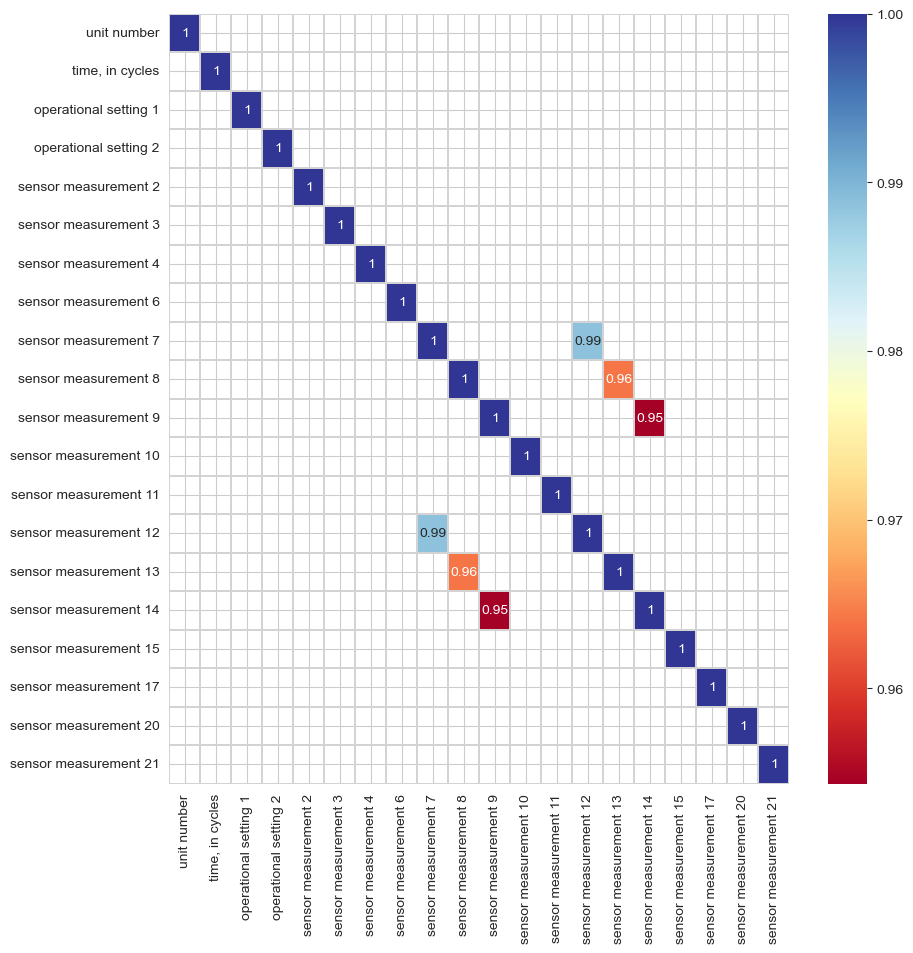

In [89]:
#Now we look for very high correlation, which is above 0.9. Too much correlation can ruin the data
threshold = 0.90
plt.figure(figsize=(10,10))

sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = Data_set_ready.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')




In [90]:
#From the correlation graph above, we can see that there are 3 values that give too much correlation
#These are: sensor 7 and 12, 8 and 13, 9 and 14.

#Drop value that is above our treshold for correlation, which means 3 of the 6 above has to go. 
#here 12,13,14 has been chosen
#Data_set_ready_no_correlation = Data_set_ready.drop(["sensor measurement 12", "sensor measurement 13", "sensor measurement 14"], axis=1)
Data_set_ready_no_correlation = Data_set_ready.drop(['sensor measurement 7','sensor measurement 8','sensor measurement 9'],axis=1)

Data_set_ready_no_correlation.head()



,unit number,"time, in cycles",operational setting 1,operational setting 2,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 6,sensor measurement 10,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 17,sensor measurement 20,sensor measurement 21
0,1,1,-0.0005,0.0004,642.36,1583.23,1396.84,21.61,1.3,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537
1,1,2,0.0008,-0.0003,642.50,1584.69,1396.89,21.61,1.3,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491
2,1,3,-0.0014,-0.0002,642.18,1582.35,1405.61,21.61,1.3,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669
3,1,4,-0.0020,0.0001,642.92,1585.61,1392.27,21.61,1.3,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951
4,1,5,0.0016,0.0000,641.68,1588.63,1397.65,21.61,1.3,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583


(24720, 17)


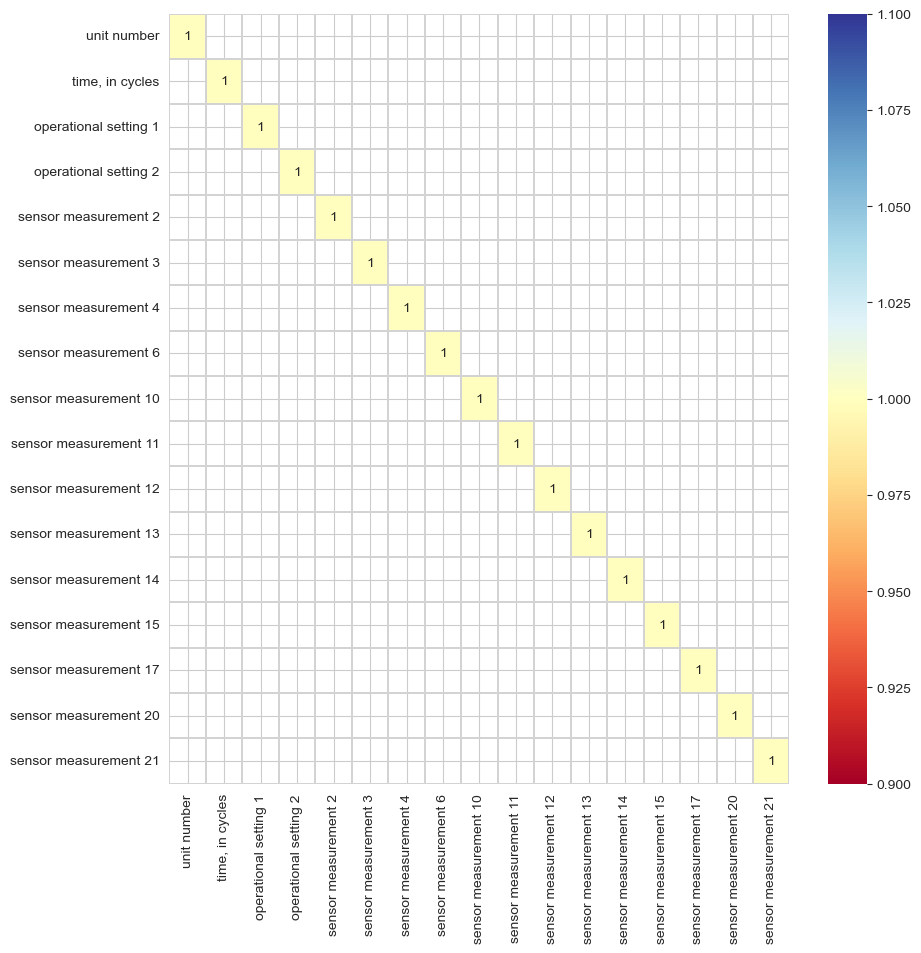

In [91]:
#See that there are no correlation left
threshold = 0.9
plt.figure(figsize=(10,10))

sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = Data_set_ready_no_correlation.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

#Print shape and see we only have 17 columns left
print(Data_set_ready_no_correlation.shape)


In [92]:
#makes (and after print) a list with the features
features = list(Data_set_ready_no_correlation.columns)
features

['unit number',
 'time, in cycles',
 'operational setting 1',
 'operational setting 2',
 'sensor measurement 2',
 'sensor measurement 3',
 'sensor measurement 4',
 'sensor measurement 6',
 'sensor measurement 10',
 'sensor measurement 11',
 'sensor measurement 12',
 'sensor measurement 13',
 'sensor measurement 14',
 'sensor measurement 15',
 'sensor measurement 17',
 'sensor measurement 20',
 'sensor measurement 21']

In [93]:
#Unique datapoints. Here we can see how many are the same. The number indicates how many unique data values there are
Data_set_ready_no_correlation.nunique()
#Print values
print(Data_set_ready_no_correlation.nunique())


unit number               100
time, in cycles           525
operational setting 1     160
operational setting 2      14
sensor measurement 2      334
sensor measurement 3     3358
sensor measurement 4     4383
sensor measurement 6       17
sensor measurement 10       4
sensor measurement 11     170
sensor measurement 12    1772
sensor measurement 13     163
sensor measurement 14    6320
sensor measurement 15    3122
sensor measurement 17      12
sensor measurement 20     165
sensor measurement 21    6440
dtype: int64


In [105]:
#See the maximum lifetime
Max_lifetime = Data_set_ready_no_correlation['time, in cycles'].max()
print("Max life time for any engine=",Max_lifetime,"\n")

#Index of the maxlifetime
max_lifetime_index = Data_set_ready_no_correlation['time, in cycles'].idxmax()
#Use the index to see 
max_lifetime_row = Data_set_ready_no_correlation.loc[max_lifetime_index,'unit number']
print("The engine with the max lifetime=",max_lifetime_row,"\n")

# define the maximum life of each engine, 
#as this could be used to obtain the RUL at each point in time of the engine's life 
#remaining useful life (RUL) of each engine in the test dataset.
#RUL is equivalent of number of flights remained for the engine after the last datapoint in the test dataset.

#The function below gives is the unit number corresponding to the maximum value of time in cyclus. 
#This mean I will get unit number 1, and get the corresponding max life time
Data_set_RUL = Data_set_ready_no_correlation.groupby(['unit number']).agg({'time, in cycles':'max'})
#Rename "time, in cycles" to "Life"
Data_set_RUL.rename(columns={'time, in cycles':'Life'},inplace=True)
#Show the new
Data_set_RUL.head()



Max life time for any engine= 525 

The engine with the max lifetime= 55 



,Life
unit number,
1,259
2,253
3,222
4,272
5,213


In [106]:
#Now I merge my life with my 
Data_set_ready_merged = Data_set_ready_no_correlation.merge(Data_set_RUL,how='left',on=['unit number'])

#Her der siger vi at life-cycles er vores RUL, så vi kalder den for RUL, og så dropper vi life da vi ikke har brug for den mere
Data_set_ready_merged['RUL'] = Data_set_ready_merged['Life'] - Data_set_ready_merged['time, in cycles']
Data_set_ready_merged.drop(['Life'],axis=1,inplace=True)

#Dette viser os nu RUL, som er den resterende livstid. Så hvis maks livstid for unit 1 er 259, så efter en cycle vil 
#der være 258 tilbage osv.

#Lad os se hvordan den ser ud
Data_set_ready_merged.head()


,unit number,"time, in cycles",operational setting 1,operational setting 2,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 6,sensor measurement 10,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 17,sensor measurement 20,sensor measurement 21,RUL
0,1,1,-0.0005,0.0004,642.36,1583.23,1396.84,21.61,1.3,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537,258
1,1,2,0.0008,-0.0003,642.50,1584.69,1396.89,21.61,1.3,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491,257
2,1,3,-0.0014,-0.0002,642.18,1582.35,1405.61,21.61,1.3,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669,256
3,1,4,-0.0020,0.0001,642.92,1585.61,1392.27,21.61,1.3,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951,255
4,1,5,0.0016,0.0000,641.68,1588.63,1397.65,21.61,1.3,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583,254


In [95]:
#Vi kan se der er 0 nul værdier som der skal være
print(Data_set_ready_merged.isnull().sum())


unit number              0
time, in cycles          0
operational setting 1    0
operational setting 2    0
sensor measurement 2     0
sensor measurement 3     0
sensor measurement 4     0
sensor measurement 6     0
sensor measurement 10    0
sensor measurement 11    0
sensor measurement 12    0
sensor measurement 13    0
sensor measurement 14    0
sensor measurement 15    0
sensor measurement 17    0
sensor measurement 20    0
sensor measurement 21    0
RUL                      0
dtype: int64


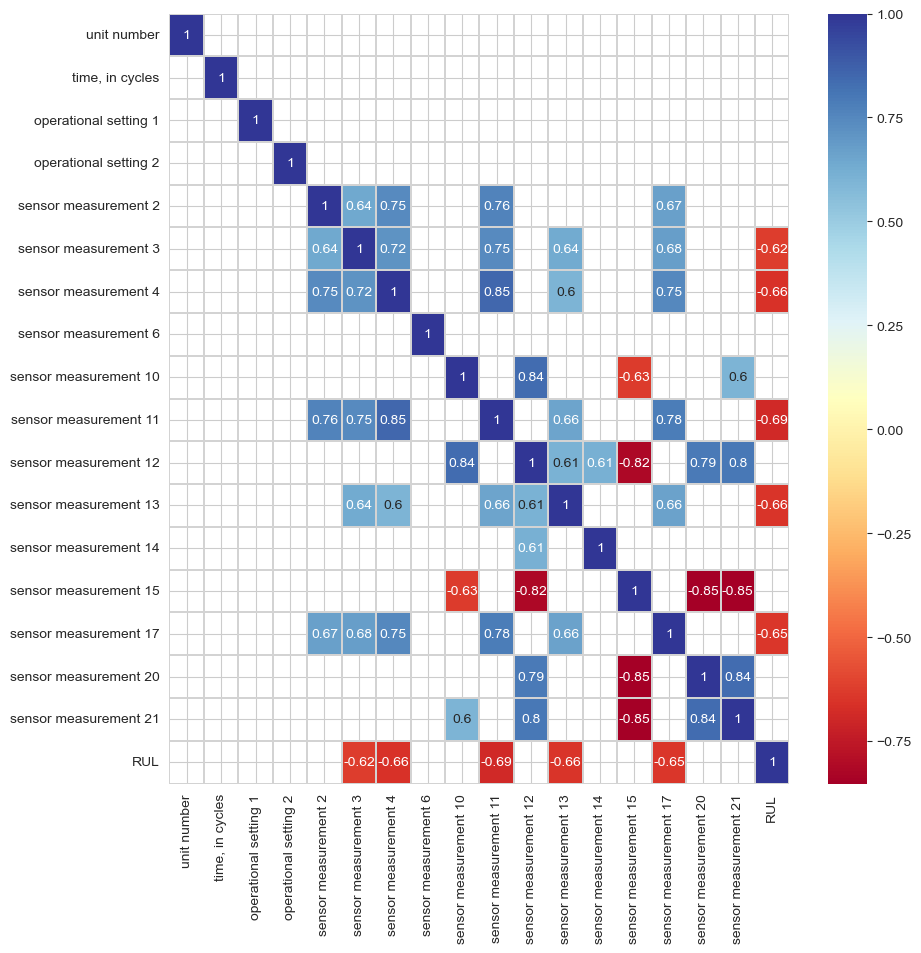

In [96]:
#Now we can look at the correlation between the data and the RUL. 
threshold = 0.90
plt.figure(figsize=(10,10))
threshold = 0.6
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = Data_set_ready_merged.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')





In [33]:
#Above we can see that there are quite a lot of values that has very little correlation with RUL
#Here we could remove all those values, and the code is below to do it, but lets wait with that

# Data_set_ready_merged = Data_set_ready_merged.drop(["sensor measurement 21", "sensor measurement 20", "sensor measurement 15"
#,"sensor measurement 10","sensor measurement 9","sensor measurement 7","sensor measurement 6", "2","operational setting 2"
#, "operational setting 1"], axis=1)




 Data_set_ready_merged = Data_set_ready_merged.drop(["unit number"], axis=1)


In [97]:
#I start by splitting my train up in x and y. y is the RUL data. x is the rest
x = Data_set_ready_merged.iloc[:, :-1]
y = Data_set_ready_merged.iloc[:,-1]


In [98]:
#Now we can begin to scale the data - notice here there are other scaling methods that can be used as the "standard scaler"
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#I start by scaling my x
sc_maxmin = MinMaxScaler()
x_scaled_maxmin = sc_maxmin.fit_transform(x)


In [99]:
#We can if we want split the data into a test and training set. BUT, we already downloaded a test set, so there is 
#no need to do it.
x_train, x_test, y_train, y_test = train_test_split(x_scaled_maxmin, y, test_size=0.2, random_state=42)

In [129]:
#Now I can begin on the linear regression. We start with the one called "linear regression"

#Define the linearregression and afterwards fit it to our x_scaled and y
model = LinearRegression()
results = model.fit(x_train, y_train)

#Predict my score linear regression
print('Training score',results.score(x_train, y_train)*100)
print('Test score',results.score(x_test, y_test)*100)


Training score 61.79697507359763
Test score 62.291105217959085


In [144]:
#Make my KNN regressor
model_KNN = KNeighborsRegressor(n_neighbors=9)
results_KNN = model_KNN.fit(x_train, y_train)

#Predict my score for KNN
print('Training score',results_KNN.score(x_train, y_train)*100)
print('Test score',results_KNN.score(x_test, y_test)*100)


Training score 83.09624141348509
Test score 80.10797751308768


{'kneighborsregressor__n_neighbors': 11}
Grid score of CV =  0.8013017089398953


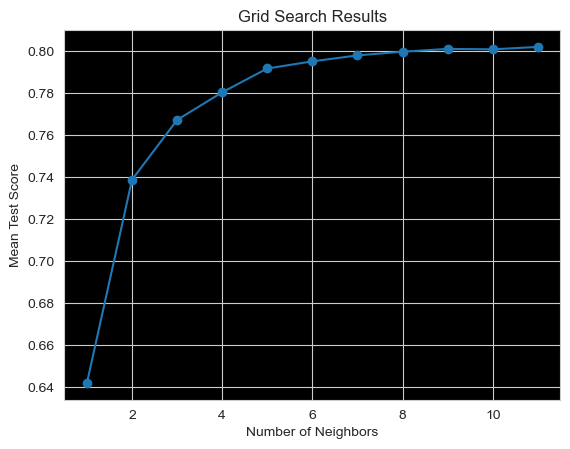

In [151]:
import matplotlib.pyplot as plt

#Her der scaler jeg og bruger KNN samtidig for at se hvilken antal naboer der er bedstmed gridsearchcv

#knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
knn_pipe = make_pipeline(MinMaxScaler(), KNeighborsRegressor())

#Laver vores parametre som er vores antal naboer fra 1 til 10 for at se hvor mange naboer der vil være det bedste.
#Vi bruger dermed GridSearchCV til at finde bedste parametre
param_grid = {'kneighborsregressor__n_neighbors': range(1, 12)}

#Laver vores gridsearsh validation ud fra vores pipeline og paramgrid(cross validation sker inde i vores gridsearh, da cv står for cross validation)
#grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid = GridSearchCV(knn_pipe, param_grid, cv=10)


#Vi fitter vores grid med voes x_train og y_train
grid.fit(x_train, y_train)


#Printer vores bedste parametre, som så vil være at vi skal bruge 8 naboer
print(grid.best_params_)
#Printer grid score
grid_score = grid.score(x_test, y_test)
print('Grid score of CV = ',grid_score)




import numpy as np

# Define the range of n_neighbors
neighbors_range = range(1, 12)

# Initialize an empty array to store scores
all_scores = []

# Loop through each value of n_neighbors
for n_neighbors in neighbors_range:
    # Create a new KNN model with the current value of n_neighbors
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    # Fit the model on the training data
    knn_model.fit(x_train, y_train)
    
    # Calculate the score on the test set
    score = knn_model.score(x_test, y_test)
    
    # Append the score to the array
    all_scores.append(score)

# Convert the list to a numpy array
all_scores = np.array(all_scores)


plt.plot(range(1, 12), all_scores, marker='o')
plt.title('Grid Search Results')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()





#For StandardScaler
#{'kneighborsregressor__n_neighbors':11}
#0.7679816766492934

#For Maxminscaler
#'kneighborsregressor__n_neighbors':11}
#0.800929820248109



In [134]:
#Make my Lasso regressor
model_Lasso = Lasso()
results_Lasso = model_Lasso.fit(x_train, y_train)

#Predict my score for KNN
print('Training score',results_Lasso.score(x_train, y_train)*100)
print('Test score',results_Lasso.score(x_test, y_test)*100)



Training score 58.12390945133834
Test score 58.83396254650999


In [135]:
#Make my Ridge regressor
model_Ridge = Ridge()
results_Ridge = model_Ridge.fit(x_train, y_train)

#Predict my score for KNN
print('Training score',results_Ridge.score(x_train, y_train)*100)
print('Test score',results_Ridge.score(x_test, y_test)*100)


Training score 61.79611011201275
Test score 62.28826528932934
